# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [2]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares (takster)
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [3]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02',]
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [4]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


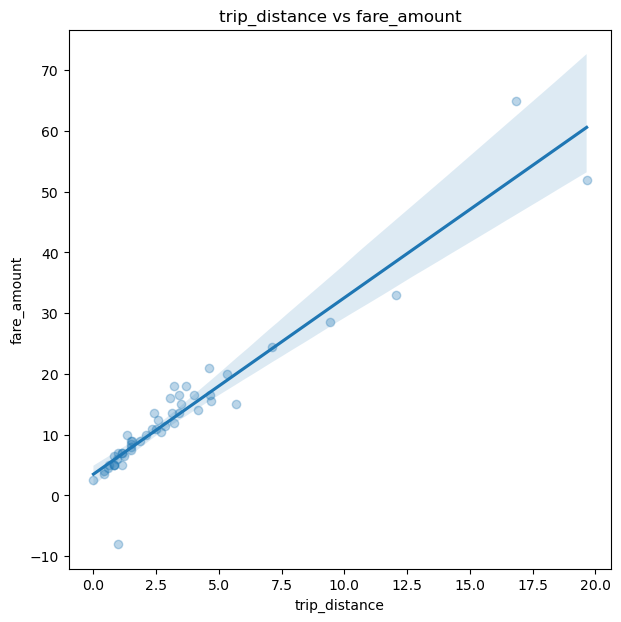

In [6]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

In [ ]:
#Ovenstående kan hjælpe med at identificere, om der er en fast prisstruktur eller en variabel prissætning baseret på afstanden.

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [8]:
# Write your code
# (Doyin)
#distribution of trip distances:
#distance per måned, 
 



In [9]:
#fares: (yasemin)
import matplotlib.pyplot as plt
negative_tip_rows = df_yellow[df_yellow["tip_amount"] < 0]

# Udskriv antallet af rækker med negative tip_amount
print("Antal rækker med negative tip_amount:", len(negative_tip_rows))



Antal rækker med negative tip_amount: 549


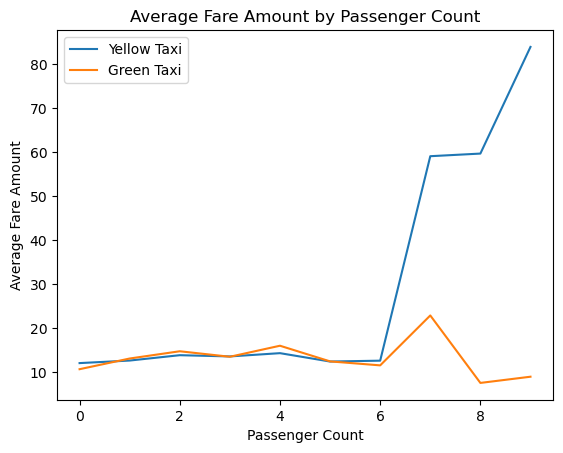

Correlation between Fare Amount and Passenger Count (Yellow Taxi): 0.0013100090667954461
Correlation between Fare Amount and Passenger Count (Green Taxi): -0.0014174468388466438

Undersøg forholdet mellem passenger count og fare amount - hvordan ser tendensen ud?
Descriptive Statistics for Fare Amount (Yellow Taxi):
                     count       mean         std    min    25%    50%  \
passenger_count                                                          
0.0               114266.0  12.094647   10.869232 -115.0   6.50   9.00   
1.0              3944723.0  12.674994  202.282343 -600.0   6.50   9.00   
2.0               763326.0  13.891214   13.689845 -357.0   6.50   9.50   
3.0               188228.0  13.610418   13.553080 -130.0   6.50   9.50   
4.0                76448.0  14.353923   15.380215 -250.0   6.50   9.50   
5.0               110394.0  12.451657   11.065279  -52.0   6.50   9.00   
6.0                72700.0  12.646320   10.836382  -52.0   6.50   9.00   
7.0             

In [34]:

#jeg burde fjerne outliers først


fare_by_passenger_yellow = df_yellow.groupby('passenger_count')['fare_amount'].mean()
fare_by_passenger_green = df_green.groupby('passenger_count')['fare_amount'].mean()

import matplotlib.pyplot as plt

plt.plot(fare_by_passenger_yellow.index, fare_by_passenger_yellow.values, label='Yellow Taxi')
plt.plot(fare_by_passenger_green.index, fare_by_passenger_green.values, label='Green Taxi')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Passenger Count')
plt.legend()
plt.show()

correlation_yellow = df_yellow['fare_amount'].corr(df_yellow['passenger_count'])
correlation_green = df_green['fare_amount'].corr(df_green['passenger_count'])
print("Correlation between Fare Amount and Passenger Count (Yellow Taxi):", correlation_yellow)
print("Correlation between Fare Amount and Passenger Count (Green Taxi):", correlation_green)

print('')
print('Undersøg forholdet mellem passenger count og fare amount - hvordan ser tendensen ud?')
grouped_data_yellow = df_yellow.groupby('passenger_count')['fare_amount']
grouped_data_green = df_green.groupby('passenger_count')['fare_amount']
print('Descriptive Statistics for Fare Amount (Yellow Taxi):')
print(grouped_data_yellow.describe())
print('')
print('Descriptive Statistics for Fare Amount (Green Taxi):')
print(grouped_data_green.describe())


#skal jeg lave scatter plot istedet?


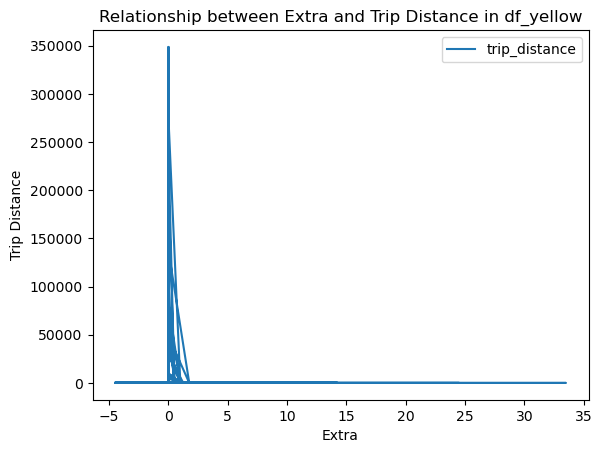

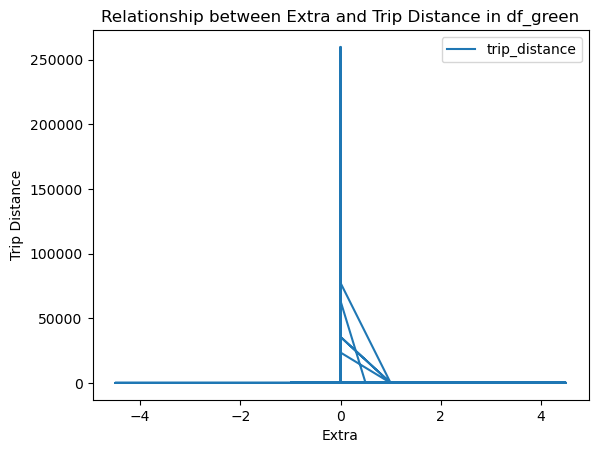

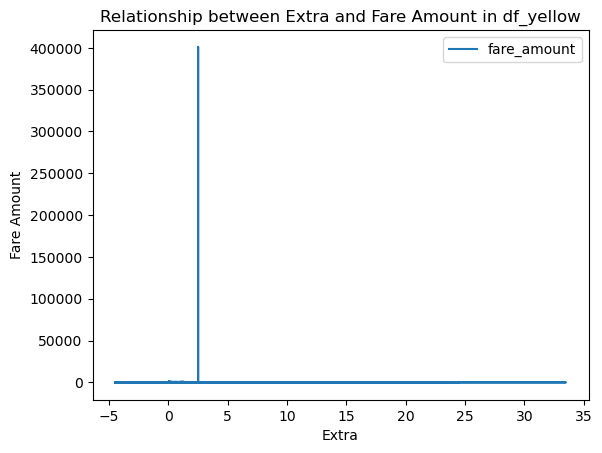

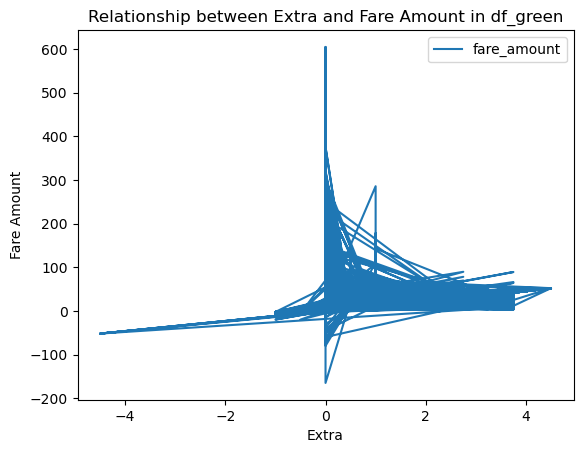

Extra Statistics in df_yellow:
count    5.443362e+06
mean     1.012510e+00
std      1.235380e+00
min     -4.500000e+00
25%      0.000000e+00
50%      5.000000e-01
75%      2.500000e+00
max      3.350000e+01
Name: extra, dtype: float64
Extra Statistics in df_green:
count    131894.000000
mean          0.352010
std           0.659656
min          -4.500000
25%           0.000000
50%           0.000000
75%           0.500000
max           4.500000
Name: extra, dtype: float64


In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Relationship between "extra" and trip distance in df_yellow
df_yellow.plot(x='extra', y='trip_distance')
plt.xlabel('Extra')
plt.ylabel('Trip Distance')
plt.title('Relationship between Extra and Trip Distance in df_yellow')
plt.show()

# Relationship between "extra" and trip distance in df_green
df_green.plot(x='extra', y='trip_distance')
plt.xlabel('Extra')
plt.ylabel('Trip Distance')
plt.title('Relationship between Extra and Trip Distance in df_green')
plt.show()

# Relationship between "extra" and fare amount in df_yellow
df_yellow.plot(x='extra', y='fare_amount')
plt.xlabel('Extra')
plt.ylabel('Fare Amount')
plt.title('Relationship between Extra and Fare Amount in df_yellow')
plt.show()

# Relationship between "extra" and fare amount in df_green
df_green.plot(x='extra', y='fare_amount')
plt.xlabel('Extra')
plt.ylabel('Fare Amount')
plt.title('Relationship between Extra and Fare Amount in df_green')
plt.show()

# Additional analysis for df_yellow
extra_stats_yellow = df_yellow['extra'].describe()
print("Extra Statistics in df_yellow:")
print(extra_stats_yellow)

# Additional analysis for df_green
extra_stats_green = df_green['extra'].describe()
print("Extra Statistics in df_green:")
print(extra_stats_green)

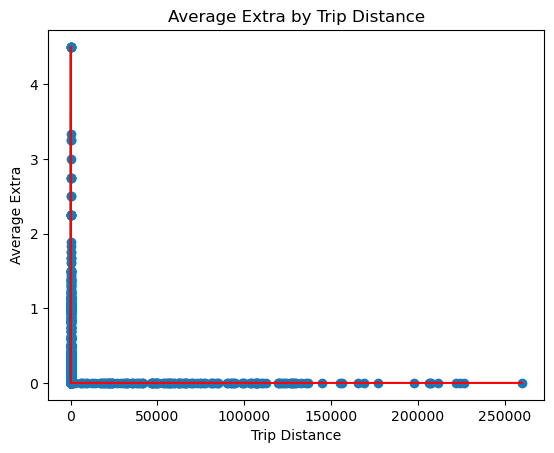

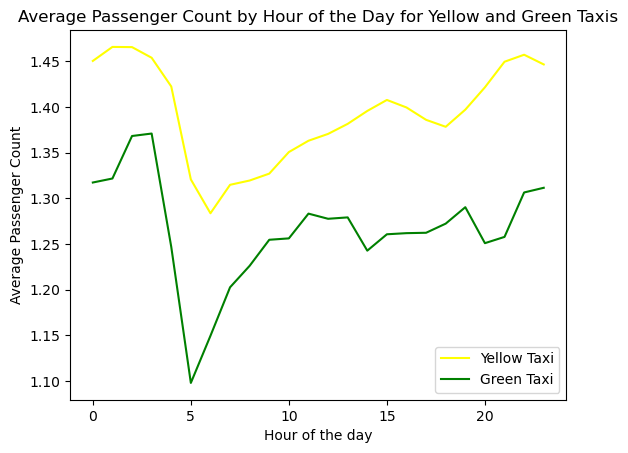

In [48]:
#Passenger counts (Andreas)
#1. Creating Line plot that displays passenger count by hour of the day

# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()


#nogle af koderne anvendes ikke??

In [47]:
#the relationship between these variables: (Yasemin)

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [12]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [13]:
# Write your code

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [14]:
# Write your code

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [15]:
# Write your code

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.